# Feldspar ternary classification diagram
- Functions written by Jordan Lubbers, adaptations+ merging into Thermobar by Penny Wieser
- The function uses fields for Fspar ternary from Deer, Howie, and Zussman (1963).
- You may have problems with this package if you have the separate "ternary" package installed (yes, there are python packages called ternary and python-ternary- Yay!). I (penny) got the error "module ternary has no attribute figure, so had to uninstall the ternary I had through pip (pip uninstall ternary), and re-install python-ternary through conda in the command line "conda install python-ternary". If you have everything in pip, or conda, keep in 1 environment, don't follow my bad example here!
- This function relies heavily on the ternary plot package from Marc Harper et al. 2015 - https://github.com/marcharper/python-ternary, if you use these figures, you must cite that (Marc Harper et al. (2015). python-ternary: Ternary Plots in Python. Zenodo. 10.5281/zenodo.594435) as well as Thermobar. 

In [1]:
import ternary
#  We tested using ternary V.1.0.8
print(ternary.__version__)

1.0.8


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Thermobar as pt
from scipy import interpolate

In [3]:
out=pt.import_excel('Two_Feldspar_input.xlsx', sheet_name="Paired_Plag_Kspar")
# This extracts a dataframe of all inputs
my_input=out['my_input']
# This extracts a dataframe of kspar compositions from the dictionary "out"
Kspars=out['Kspars']
# This extracts a dataframe of plag compositions from the dictionary "out"
Plags=out['Plags']

In [4]:
# Use thermobar to get cation fractions
Kspar_Comps = pt.calculate_cat_fractions_kspar(kspar_comps=Kspars)
Plag_Comps = pt.calculate_cat_fractions_plagioclase(plag_comps=Plags)

## Example 1 - Just the classification diagram (be patient, we will add your data in example 2)!
- There are a number of options in the function, or you can roll with the defaults
1. Choose your fig size (default, 6,6)
2. Whether you want your major and minor grid (default False)
3. Whether you want the labels (saying San, Ab, Ol, default False)
4. What you want these labels to read, by default, we have used these:
    Anorthite_label='An',
    Anorthoclase_label='AnC',
    Albite_label='Ab',
    Oligoclase_label='Ol',
    Andesine_label='Ad',
    Labradorite_label='La',
    Bytownite_label='By',
    Sanidine_label='San',
But you can change any of these using Sanidine_label='Sanidine'
5. The font size ofthe component labels (default 10), e.g., if you go for full words, you might need to reduce the font size, e.g.,  fontsize_component_labels=6.
6. The font size of the axes labels (default 14).
7. major_grid_kwargs, this sets the colors, by default, its grey. 

### Example 1a - Using all the defaults
- This gives you the simplicest diagram possible, e.g., just the lines.

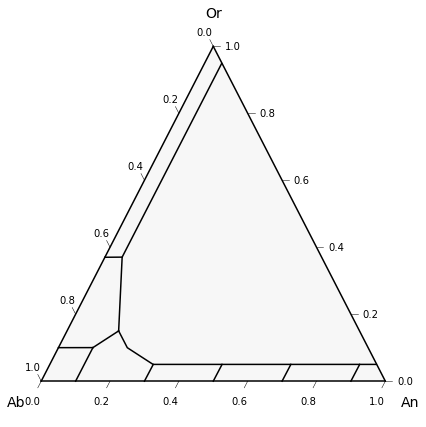

In [5]:
fig, tax = pt.plot_fsp_classification()
fig.tight_layout()

### Example 1b - Lets add the default compositional labels

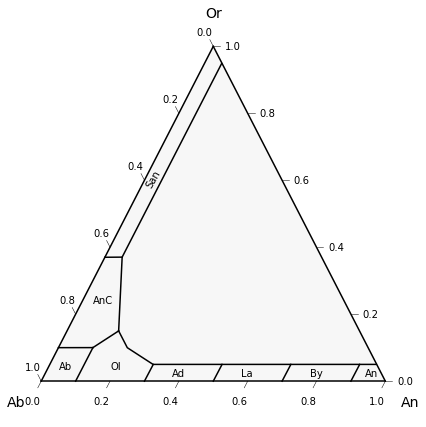

In [6]:
fig, tax = pt.plot_fsp_classification(labels=True)
fig.tight_layout()

### Example 1c - Lets change it, so it reads "Sanidine" instead of San

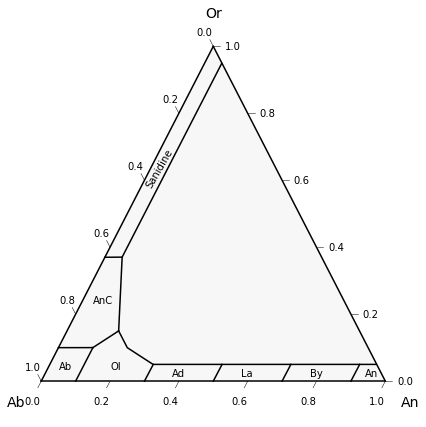

In [7]:
fig, tax = pt.plot_fsp_classification(labels=True, 
                                    Sanidine_label='Sanidine')
fig.tight_layout()

### Example 1d - Lets add grid lines
- Default for major grid lines is linestyle (ls) is dashed, line width (lw) = 0.5, color ("c") is black ("k")

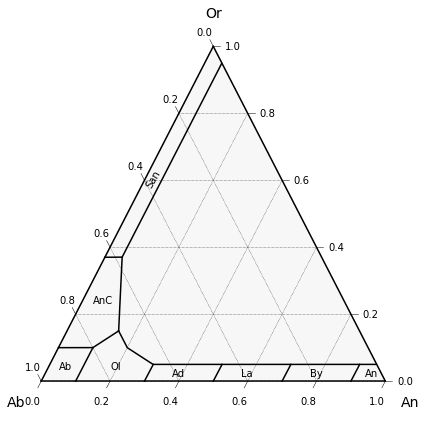

In [8]:
fig, tax = pt.plot_fsp_classification(labels=True,  major_grid=True)
fig.tight_layout()

### Example 1e - But say we want pink grid lines!

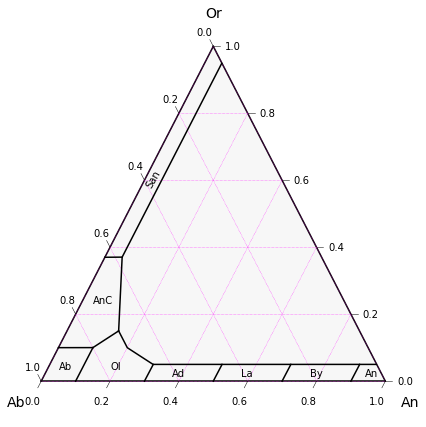

In [9]:
fig, tax = pt.plot_fsp_classification(labels=True,  major_grid=True, major_grid_kwargs={"ls": ":", "lw": 0.5, "c": "magenta"})
fig.tight_layout()

### Example 1f - Minor and major gridlines

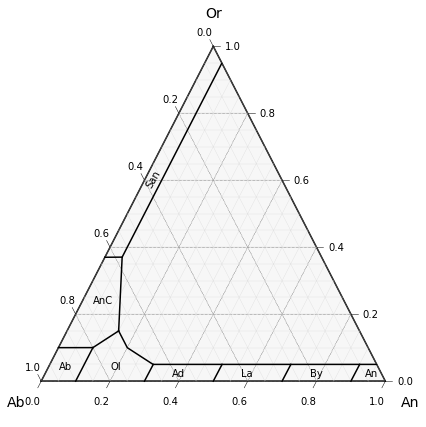

In [10]:
fig, tax = pt.plot_fsp_classification(labels=True,  major_grid=True, minor_grid=True)
fig.tight_layout()

### Example 1g - Say we dont want ticks

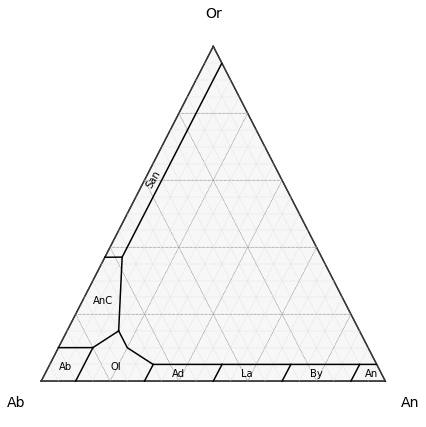

In [11]:
fig, tax = pt.plot_fsp_classification(labels=True,  major_grid=True, minor_grid=True, ticks=False)
fig.tight_layout()

## Example 2 - plotting data on top of classification
...and some random customizations to show flexibility

### Example 2a - Simple plot coloring symbols by type
- We use the Thermobar function "tern points" to convert your calculated plag and kspar data into the necessary coordinates for the ternary plot, you'll need to do this for as many datasets as you want to plot

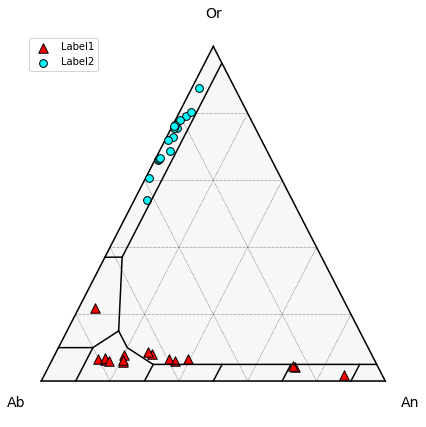

In [15]:
# Calling tern_points function for plag and kspar data
plag_points = pt.tern_points(
    Plag_Comps["An_Plag"], Plag_Comps["Or_Plag"], Plag_Comps["Ab_Plag"]
)
kspar_points = pt.tern_points(
    Kspar_Comps["An_Kspar"], Kspar_Comps["Or_Kspar"], Kspar_Comps["Ab_Kspar"]
)


# make the figure with the classification lines as in the examples above.

fig, tax = pt.plot_fsp_classification(major_grid=True, ticks=False)

# Here we plot the data ontop, with plag as red triangles
tax.scatter(
    plag_points,
    edgecolor="k",
    marker="^",
    facecolor="red",
    label='Label1',
   s=90
)
# And Kspars as blue dots

tax.scatter(
    kspar_points,
    edgecolor="k",
    marker="o",
    facecolor="cyan",
   s=60, label='Label2'
)
tax.legend(loc='upper left')
fig.tight_layout()
fig.savefig('Simple_Plag_Fspar.png', dpi=200)

### Example 2b - Coloring symbols by a Fspar FeOt content
- Need to make the plot a bit wier (8) to account for the color legend

<AxesSubplot:>

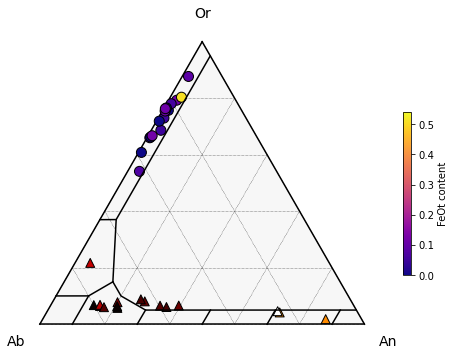

In [16]:

# make the figure with the classification lines as in the examples above.

fig, tax = pt.plot_fsp_classification(figsize=(8, 6), major_grid=True, ticks=False)

# Here, we color based on the Cation proportion of FeOt in plag. 
# Vmin and vmax just resets the colorbar (by default it does weird things)
# Here, we use the same colorbar for both plots. 
tax.scatter(
    plag_points,
    c=Plag_Comps["FeOt_Plag"],
    vmin=np.min([Plag_Comps["FeOt_Plag"], Kspar_Comps["FeOt_Kspar"]]),
    vmax=np.max([Plag_Comps["FeOt_Plag"], Kspar_Comps["FeOt_Kspar"]]),
    s=80,
    edgecolor="k",
    marker="^",
    cmap="hot",
    colormap="hot",
    
)

tax.scatter(
    kspar_points,
    c=Kspar_Comps["FeOt_Kspar"],
    vmin=np.min([Plag_Comps["FeOt_Plag"], Kspar_Comps["FeOt_Kspar"]]),
    vmax=np.max([Plag_Comps["FeOt_Plag"], Kspar_Comps["FeOt_Kspar"]]),    edgecolor="k",
    s=100,
    cmap="plasma",
    colormap="plasma",
        colorbar=True,
    cb_kwargs={"shrink": 0.5, "label": "FeOt content"},
)

## Example 3 - Setting symbol size by FeOt content

<AxesSubplot:>

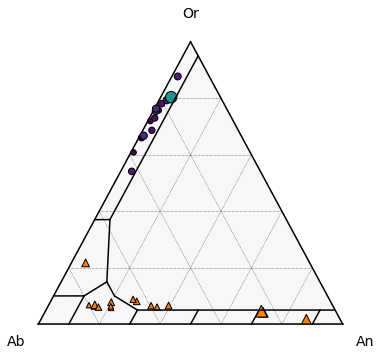

In [17]:

# make the figure with the classification lines as in the examples above.

fig, tax = pt.plot_fsp_classification(figsize=(6, 6), major_grid=True, ticks=False)

# Here, we color based on the Cation proportion of FeOt in plag. 
# Vmin and vmax just resets the colorbar (by default it does weird things)
# Here, we use the same colorbar for both plots. 
tax.scatter(
    plag_points,
    s=200*Plag_Comps["FeOt_Plag"]+30,
    edgecolor="k",
    marker="^"
    
)

tax.scatter(
    kspar_points,
    c=Kspar_Comps["FeOt_Kspar"],
 s=200*Kspar_Comps["FeOt_Kspar"]+30,
           edgecolor="k",
    marker="o"
)